# Neural Networks and Deep Learning

Neural networks are __universal function approximators__.

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import tensorflow as tf
import tensorflow.keras as keras

## Import data 

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=50, random_state=123)

scaler = StandardScaler()
Xtrn = scaler.fit_transform(Xtrn)
Xtst = scaler.transform(Xtst)

We can consider a NN model as just __a black box with a bunch of unnown parameters__. 

For example, when the output is a Dense layer with just one node (i.e. a __perceptron__), the entire network model is just doing some form of __regression__. If we use a single node with a _sigmoid activation function_, the model is essentially doing _logistic regression_.

## The Perceptron

A __perceptron__ is a neural network composed of a single layer.

When its activation function is a sigmoid, it is equivalent to a __logistic regression__.  
When its activation function is linear, it is equivalent to a __linear regression__.  


![img](https://ars.els-cdn.com/content/image/1-s2.0-S0038092X1200326X-gr1.jpg)

In [6]:
Xtrn.shape

(519, 30)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
perceptron = Sequential([
    Dense(1, 
          activation='sigmoid', 
          input_shape=Xtrn.shape[1:]),
])

In [9]:
perceptron.compile(loss="binary_crossentropy", 
                optimizer="sgd", 
                metrics=["accuracy"])

In [10]:
perceptron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = perceptron.fit(Xtrn, 
                      ytrn,
                      epochs=20,
                      verbose=0,
                      validation_split=0.2)

In [12]:
df = pd.DataFrame(hist.history)
df

loss  accuracy  val_loss  val_accuracy
0   0.479798  0.783133  0.414269      0.807692
1   0.417496  0.824096  0.363355      0.846154
2   0.369971  0.857831  0.325101      0.865385
3   0.332732  0.879518  0.295652      0.875000
4   0.302958  0.884337  0.272362      0.894231
5   0.278584  0.893976  0.253595      0.903846
6   0.258677  0.898795  0.238297      0.903846
7   0.241824  0.908434  0.225572      0.923077
8   0.227694  0.915663  0.214888      0.923077
9   0.215617  0.922892  0.205835      0.932692
10  0.205241  0.932530  0.198055      0.942308
11  0.196233  0.939759  0.191323      0.942308
12  0.188374  0.942169  0.185460      0.942308
13  0.181455  0.942169  0.180301      0.951923
14  0.175330  0.942169  0.175721      0.951923
15  0.169892  0.946988  0.171633      0.951923
16  0.164963  0.946988  0.167967      0.951923
17  0.160526  0.946988  0.164655      0.951923
18  0.156527  0.946988  0.161649      0.951923
19  0.152828  0.956627  0.158906      0.951923

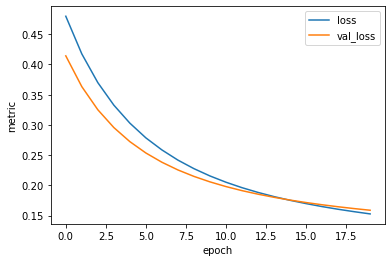

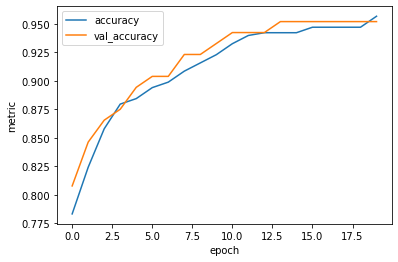

In [13]:
df[['loss','val_loss']].plot(xlabel='epoch',ylabel='metric');
df[['accuracy','val_accuracy']].plot(xlabel='epoch',ylabel='metric');

In [14]:
perceptron.evaluate(Xtst, ytst)

2/2 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9000


[0.2040088027715683, 0.8999999761581421]

In [15]:
k = 5
np.c_[perceptron.predict(Xtst[:k, :]), ytst[:k]]

1/1 [==============================] - 0s 203ms/step


array([[0.97542804, 1.        ],
       [0.95204812, 1.        ],
       [0.16991392, 0.        ],
       [0.99190861, 1.        ],
       [0.01185353, 0.        ]])

## Neural Network

A neural network is composed of multiple __layers__ with multiple perceptrons (called __neurons__) in each layer.

![img](https://miro.medium.com/proxy/1*YL2a2dbDQ5754h_ktDj8mQ.png)

In [16]:
NN= Sequential([
    Dense(8, input_shape=Xtrn.shape[1:]),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')]
)

In [17]:
NN.compile(loss="binary_crossentropy", 
             optimizer="sgd", 
             metrics=["accuracy"])

In [18]:
NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 248       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = NN.fit(Xtrn, 
              ytrn,
              epochs=20,
              verbose=0,
              validation_split=0.2)

In [20]:
df = pd.DataFrame(hist.history)
df

loss  accuracy  val_loss  val_accuracy
0   0.894836  0.404819  0.752290      0.509615
1   0.725094  0.554217  0.653167      0.663462
2   0.625070  0.669879  0.587144      0.778846
3   0.552871  0.763855  0.534061      0.817308
4   0.493884  0.840964  0.489657      0.836538
5   0.444371  0.898795  0.448975      0.884615
6   0.399790  0.922892  0.413284      0.894231
7   0.360663  0.939759  0.381629      0.894231
8   0.326331  0.944578  0.352907      0.894231
9   0.296054  0.956627  0.326631      0.894231
10  0.269334  0.956627  0.304063      0.894231
11  0.246385  0.956627  0.285103      0.903846
12  0.226936  0.959036  0.269031      0.913462
13  0.210105  0.961446  0.254927      0.913462
14  0.195305  0.961446  0.242729      0.913462
15  0.182542  0.961446  0.232173      0.923077
16  0.171449  0.961446  0.223075      0.923077
17  0.161907  0.963855  0.215127      0.923077
18  0.153448  0.963855  0.207886      0.923077
19  0.146095  0.966265  0.201220      0.923077

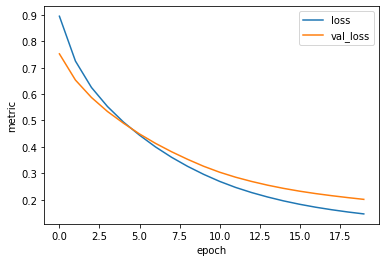

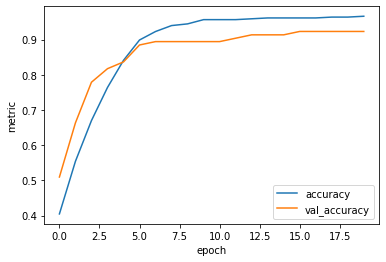

In [21]:
df[['loss','val_loss']].plot(xlabel='epoch',ylabel='metric');
df[['accuracy','val_accuracy']].plot(xlabel='epoch',ylabel='metric');

In [22]:
perceptron.evaluate(Xtst, ytst)
NN.evaluate(Xtst, ytst)

2/2 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9400


[0.20094658434391022, 0.9399999976158142]

## Auto-Neural Networks
Searches for the "best" neural network architecture and hyperparameters

In [23]:
import autokeras as ak

In [24]:
autoNN = ak.StructuredDataClassifier(max_trials=5) #Run at most 5 models. Default = 100
autoNN.fit(Xtrn, ytrn, epochs=3)
print(autoNN.evaluate(Xtst, ytst))

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
17/17 [==============================] - 1s 3ms/step - loss: 1.3259 - accuracy: 0.1503
Epoch 2/3
17/17 [==============================] - 0s 4ms/step - loss: 0.9052 - accuracy: 0.3545
Epoch 3/3
17/17 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.6647
INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets
2/2 [==============================] - 1s 9ms/step - loss: 0.4824 - accuracy: 0.8400
[0.48243942856788635, 0.8399999737739563]


Problem with Auto-NN: Except for trivial tasks, space is just too big. Better use an architecture that has been thoroughly validated and __fine-tune__ it (a.k.a. __transfer learning__).

## Pre-Trained models

We won't actually be creating models from scratch...  
... especially not Deep Learning models (Why?)

Instead, we'll use _pre-trained models_.

Pre-trained models can be used _as is_ (for _inference_) or fine-tuned.

### Use of pre-trained models for inference

In [33]:
from tensorflow.keras.applications.resnet import ResNet50, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [34]:
#Load model
pretrained_model = ResNet50()

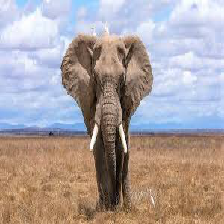

In [38]:
#Load and pre-process data
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

img

In [39]:
#Use model to classify image
pred = pretrained_model.predict(x)
decode_predictions(pred, top=3)

1/1 [==============================] - 0s 192ms/step


[[('n02504458', 'African_elephant', 0.61264896),
  ('n01871265', 'tusker', 0.29732588),
  ('n02504013', 'Indian_elephant', 0.088848144)]]

#### Class discussion

> Can you think of any application where it make sense to use pre-trained models out-of-the-box?  
>  (i.e. without customizing for our specific case)

#### Sidenote: Why do we call this Deep Learning?

In [41]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [40]:
pretrained_model.weights

[<tf.Variable 'conv1_conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32, numpy=
 array([[[[ 2.82526277e-02, -1.18737184e-02,  1.51488732e-03, ...,
           -1.07003953e-02, -5.27982824e-02, -1.36667420e-03],
          [ 5.86827798e-03,  5.04415408e-02,  3.46324709e-03, ...,
            1.01423981e-02,  1.39493728e-02,  1.67549420e-02],
          [-2.44090753e-03, -4.86173332e-02,  2.69966386e-03, ...,
           -3.44439060e-04,  3.48098315e-02,  6.28910400e-03]],
 
         [[ 1.81872323e-02, -7.20698107e-03,  4.80302610e-03, ...,
           -7.43396254e-03, -8.56800564e-03,  1.16849300e-02],
          [ 1.87554304e-02,  5.12730293e-02,  4.50406177e-03, ...,
            1.39413681e-02,  1.26296384e-02, -1.73004344e-02],
          [ 1.90453827e-02, -3.87909152e-02,  4.25842637e-03, ...,
            2.75742816e-04, -1.27962548e-02, -8.35626759e-03]],
 
         [[ 1.58849321e-02, -1.06073255e-02,  1.30999666e-02, ...,
           -2.26797583e-03, -3.98984266e-04,  3.39989027e-04],
      

We will _not_ be training these models from scratch!

### Fine-tuning pre-trained models
(a.k.a. __transfer learning__)

In [7]:
import tensorflow as tf

#Import package to load dataset to which we'll fine tune our model
import tensorflow_datasets as tfds

#Import pretrained model
from tensorflow.keras.applications.inception_v3 import InceptionV3

#Import functions to customize architecture of pretrained model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [8]:
#Load dataset we'll use to fine tune our model
#This is the data where we wish our model to perform well
ds, info = tfds.load(name='fashion_mnist', 
                     as_supervised=True, 
                     batch_size=32,
                     with_info=True)

In [9]:
#We'll be using InceptionV3.
#InceptionV3 requires that inputs be images of 75 pixels x 75 pixels
size = [75, 75]

In [10]:
#Pre-process training and test data
Xtrn = (ds['train'].
        map(lambda image, label: 
            (tf.image.resize(tf.image.grayscale_to_rgb(image), size), label)))
Xtst = (ds['test'].
        map(lambda image, label:
            (tf.image.resize(tf.image.grayscale_to_rgb(image), size), label)))

In [12]:
#Shape of input will be batches of 32 images of 75 pixels x 75 pixels with 3 channels
shape = [item[0].shape for item in Xtrn.take(1)][0]
shape

TensorShape([32, 75, 75, 3])

In [17]:
#Load pre-trained (base) model
base_model = InceptionV3(include_top=False)

In [18]:
#Freeze weights in base model
for layer in base_model.layers:
    layer.trainable = False

In [19]:
#Add the last layers of the model to predict 10 classes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_188 (Conv2D)            (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   96         ['conv2d_188[0][0]']             
 Normalization)                 32)                                                           

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.fit(Xtrn, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 322s 165ms/step - loss: 2.9271 - accuracy: 0.6811
Epoch 2/5
1875/1875 [==============================] - 326s 174ms/step - loss: 0.7220 - accuracy: 0.7346
Epoch 3/5
1875/1875 [==============================] - 325s 173ms/step - loss: 0.6912 - accuracy: 0.7448
Epoch 4/5
1875/1875 [==============================] - 381s 203ms/step - loss: 0.6772 - accuracy: 0.7501
Epoch 5/5
1875/1875 [==============================] - 306s 163ms/step - loss: 0.6568 - accuracy: 0.7578


In [25]:
test_loss, test_acc = model.evaluate(Xtst)
test_acc

313/313 [==============================] - 50s 147ms/step - loss: 0.6758 - accuracy: 0.7524


0.7523999810218811

## Huggingface
[Huggingface](https://huggingface.co/) is a great place to find state-of-the-art pre-trained models.  
Though you can run Huggingface models in Keras, Huggingface has its own package called `transformers`.  
Let's learn how to use the models available in Huggingspace for inference and fine-tuning.  



### Use of transformers for inference

In [ ]:
from transformers import pipeline

#### Text completion

In [ ]:
fill_the_gap = pipeline("fill-mask", model="bert-base-uncased")

In [ ]:
fill_the_gap("It's raining [MASK].")

#### Text generation

In [ ]:
generate_text = pipeline('text-generation', model="gpt2")

In [ ]:
generate_text("Once upon a time there was a little boy that ")

#### Sentiment analysis

In [ ]:
sentiment = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
sentiment("I love you!")

In [ ]:
sentiment("I wish I never met you!")

### Fine-Tuning transformers 
a.k.a. __transfer learning__

Follow [this notebook](https://github.com/huggingface/notebooks/blob/main/transformers_doc/en/training.ipynb) from Huggingface

### Diagnosing learning problems in neural network

#### Overfitting x Underfitting

![Learning_Curve](https://www.researchgate.net/profile/Pouyan-Mohajerani/publication/349898718/figure/fig9/AS:999140326653962@1615225025587/Learning-curves-can-be-used-to-examine-the-behavior-of-a-neural-network-model-during.png)

Source: Mohajerani, Pouyan & Sotoudeh, Houman. (2020). Essentials of AI Techniques: With a focus on medicine and healthcare. 

##### What to try if your model is overfitting?
* Data Augmentation
* Increase drop-out rate
* Early stopping
* Increase regularization penalty
* Simplify your network
    * Reduce the number of layers
    * Reduce the number of neurons per layer

##### What to do if your model is underfitting?
* Train for more epochs
* Decrease batch size
* Increase momentum
* Decrease regularization penalty
* Make your network more complex:
    * Increase the number of layers
    * Increase the number of neurons per layer

#### Convergence speed

![congergence-speed](https://cs231n.github.io/assets/nn3/learningrates.jpeg)

Source: Stanford, CS231n: Deep Learning for Computer Vision. Course website: http://cs231n.stanford.edu/

##### What to do if your model is taking too long to learn?
First question to ask is this:
> Is your model still learning or has it stopped learning?

If your model is still learning, try:
* increasing the learning rate
* decreasing the batch size
    * batch gradient descent
    * mini-batch gradient descent
    * stochastic gradient descent

If your model has stopped learning:
* decreasing the learning rate
* increasing the batch size
